<a href="https://colab.research.google.com/github/WilliamMejiaG/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data screening**

In [97]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/SALES_PREDICTIONS/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
#Exploring data to find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [99]:
#Creating the first filter to localte missing values in Item_Weight column feature
nan_filter_1 = df['Item_Weight'].isna()
df.loc[nan_filter_1,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [100]:
#Counting on the number of missing values
df['Item_Weight'].isna().sum()

1463

In [101]:
#Creating the second filter to localte missing values in Outlet_size column feature
nan_filter_2 = df['Outlet_Size'].isna()
df.loc[nan_filter_2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [102]:
#Counting the number of missing values
df['Outlet_Size'].isna().sum()

2410

In [103]:
#Calculating the mean for the first imputation
mean_weight = df['Item_Weight'].mean()

In [104]:
#Imputing the missing values of Item_Weight with its mean
df['Item_Weight'] = df.loc[:,'Item_Weight'].fillna(mean_weight)

In [105]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [106]:
#Check the imputation
df['Item_Weight'].isna().sum()

0

In [107]:
#Checking the most frequent categorical value
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [108]:
#Checking the order pandas outputs that value
most_frequent = df['Outlet_Size'].value_counts().index[0]
print(most_frequent)

Medium


In [109]:
#Imputing the missing values of Outlet_size with the most frequent categorical value
df['Outlet_Size'] = df.loc[:,'Outlet_Size'].fillna(most_frequent)

In [110]:
#Checking the imputation
df['Outlet_Size'].isna().sum()

0

In [111]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [112]:
#Checking the imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data analysis**

In [113]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [114]:
# Percentage calculations
sum_by_outlet_size = df.groupby(['Outlet_Size','Outlet_Type'])['Item_Outlet_Sales'].sum()
sum_by_outlet_size

Outlet_Size  Outlet_Type      
High         Supermarket Type1    2.142664e+06
Medium       Grocery Store        1.883402e+05
             Supermarket Type1    6.388161e+06
             Supermarket Type2    1.851823e+06
             Supermarket Type3    3.453926e+06
Small        Grocery Store        1.796941e+05
             Supermarket Type1    4.386518e+06
Name: Item_Outlet_Sales, dtype: float64

In [115]:
# Percentage by Outlet Size
sum_by_outlet_size/sum_by_outlet_size.groupby(level=0).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1.000000
Medium       Grocery Store        0.015851
             Supermarket Type1    0.537622
             Supermarket Type2    0.155848
             Supermarket Type3    0.290679
Small        Grocery Store        0.039353
             Supermarket Type1    0.960647
Name: Item_Outlet_Sales, dtype: float64

In [116]:
# Percentage by Outlet Type
sum_by_outlet_size/sum_by_outlet_size.groupby(level=1).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    0.165875
Medium       Grocery Store        0.511746
             Supermarket Type1    0.494541
             Supermarket Type2    1.000000
             Supermarket Type3    1.000000
Small        Grocery Store        0.488254
             Supermarket Type1    0.339584
Name: Item_Outlet_Sales, dtype: float64

In [117]:
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0.0000,2.142664e+06,0.00,0.000000e+00
Medium,188340.1724,6.388161e+06,1851822.83,3.453926e+06
Small,179694.0936,4.386518e+06,0.00,0.000000e+00


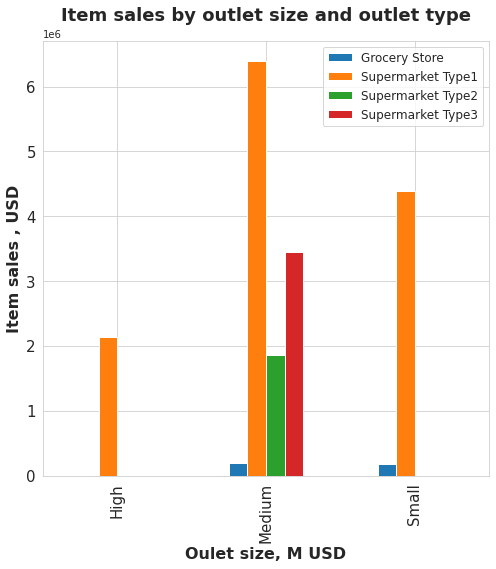

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0).plot(kind = 'bar', ax = ax)
ax.set_title('Item sales by outlet size and outlet type', fontsize = 18, fontweight = 'bold', pad = 20)
ax.set_xlabel('Oulet size, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item sales , USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)
ax.legend(fontsize = 12)
plt.show()

# Analyzing what item and how much money this item produce by Outlet Size and Outlet Type

# Outlet Size Medium and Outlet Type Supermarket Type 1

In [119]:
out_size_1 = df['Outlet_Size']=='Medium'
out_type_1 = df['Outlet_Type']=='Supermarket Type1'
df1 = df.loc[out_size_1 & out_type_1,:]
df1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


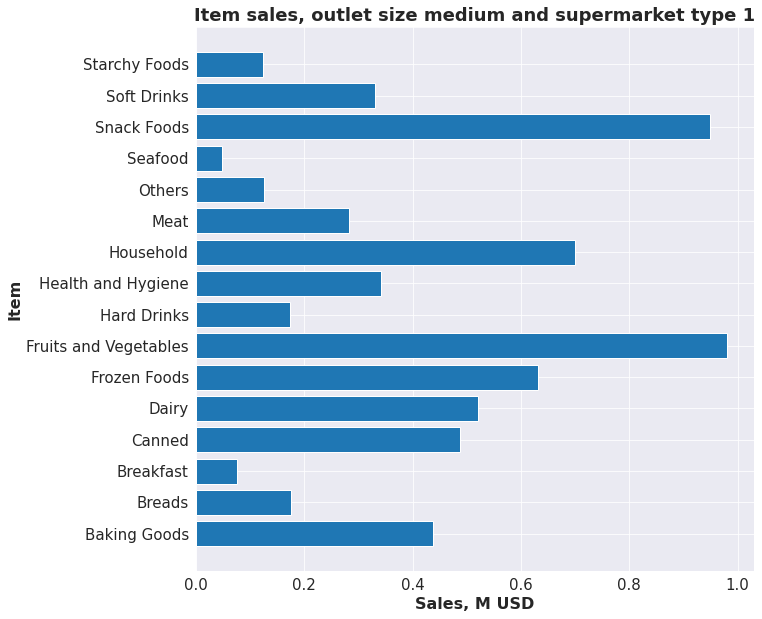

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
ax.barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax.set_title('Item sales, outlet size medium and supermarket type 1', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)


# Outlet Size Medium and Outlet Type Supermarket Type 2, 3 and grocery store

In [121]:
out_type_2 = df['Outlet_Type']=='Supermarket Type2'
df2 = df.loc[out_size_1 & out_type_2,:]
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [122]:
out_type_3 = df['Outlet_Type']=='Supermarket Type3'
df3 = df.loc[out_size_1 & out_type_3,:]
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.857645,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614


In [123]:
out_type_4 = df['Outlet_Type']=='Grocery Store'
df4 = df.loc[out_size_1 & out_type_4,:]
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266


(0.0, 1.0)

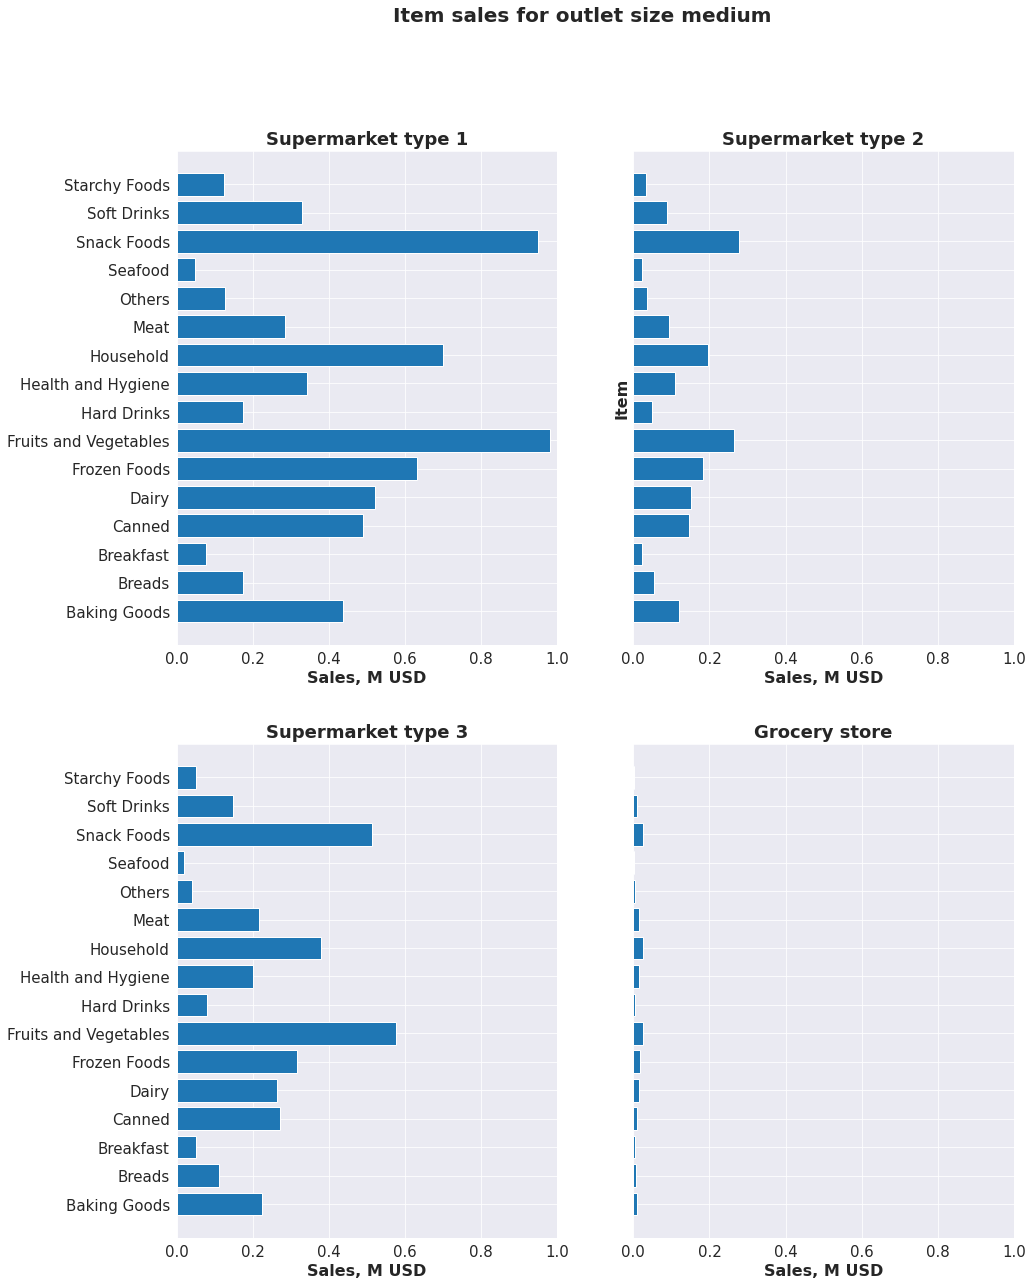

In [124]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,20), sharey='row')
fig.suptitle('Item sales for outlet size medium', fontsize = 20, fontweight = 'bold')
ax[0][1].barh(df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][1].set_title('Supermarket type 2', fontsize = 18, fontweight = 'bold')
ax[0][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][1].set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax[0][1].tick_params(axis='both', labelsize= 15)
ax[0][1].set_xlim(0,1)

ax[0][0].barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][0].set_title('Supermarket type 1', fontsize = 18, fontweight = 'bold')
ax[0][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][0].tick_params(axis='both', labelsize= 15)
ax[0][0].set_xlim(0,1)

ax[1][0].barh(df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][0].set_title('Supermarket type 3', fontsize = 18, fontweight = 'bold')
ax[1][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][0].tick_params(axis='both', labelsize= 15)
ax[1][0].set_xlim(0,1)

ax[1][1].barh(df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][1].set_title('Grocery store', fontsize = 18, fontweight = 'bold')
ax[1][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][1].tick_params(axis='both', labelsize= 15)
ax[1][1].set_xlim(0,1)